In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('D:/Study/DataScience/RFE/rfe.csv')

df.head()

,R&D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.drop(columns='State', inplace=True)

In [6]:
df.head()

,R&D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


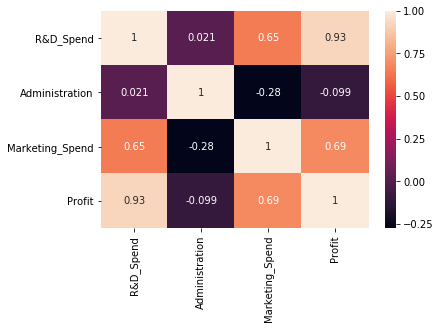

In [12]:
sns.heatmap(df.corr(), annot=True)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [20]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03])

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0 )

In [28]:
linMod = LinearRegression()

linMod.fit(x_train, y_train)

y_predict = linMod.predict(x_test)

In [68]:
from sklearn.metrics import r2_score, accuracy_score

print(r2_score(y_test, y_predict))

0.9389003773645028


In [178]:
score_li = [0]
cols_li = []
for i in range(1,len(df.columns)):
    
    a = df.iloc[:,0:i].values
    b = df.iloc[:,-1].values
    a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.2, random_state = 0 )
        
    linMod = LinearRegression()
    linMod.fit(a_train, b_train)
    b_predict = linMod.predict(a_test)
    score = r2_score(b_test,b_predict)
        
    if (score > score_li[0]):
        score_li[0] = score
            
        cols = df.iloc[:,0:i].columns
        cols_li.append(cols)

print(score_li)
print(cols_li[-1])

[0.9389003773645028]
Index(['R&D_Spend', 'Administration', 'Marketing_Spend'], dtype='object')


In [177]:
score_li = [0]
cols_li = []
for i in range(0,len(df.columns)):
    for j in range(0,len(df.columns)):
        if (i < j):
            a = df.iloc[:,i:j].values
            b = df.iloc[:,-1].values
            a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.2, random_state = 0 )
        
            linMod = LinearRegression()
            linMod.fit(a_train, b_train)
            b_predict = linMod.predict(a_test)
            score = r2_score(b_test,b_predict)
        
            if (score > score_li[0]):
                score_li[0] = score
            
                cols = df.iloc[:,0:j].columns
                cols_li.append(cols)

print(score_li)
print(cols_li[-1])

[0.9389003773645028]
Index(['R&D_Spend', 'Administration', 'Marketing_Spend'], dtype='object')
